Par Maya SAFA, Khaled SAAD et Quentin VAUTIER

In [132]:
import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

import pandas as pd


from pandas_profiling import ProfileReport

# Import des CSV pour les élèves en cours de math et portugais 

In [136]:
df_m = pd.read_csv("./student-mat.csv")


In [137]:
df_p = pd.read_csv("./student-por.csv")

In [138]:
df_p['label']="por"
df_p.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,label
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,por
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,por
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,por
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,por
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,por


In [139]:
df_m['label']="mat"
df_m.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,label
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,mat
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,mat
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,mat
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,mat
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,mat


# Fusion des deux Datasets

In [140]:
df = df_m.append(df_p)

# Information sur le Dataset

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

In [142]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [143]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.130196,-0.138521,0.049216,-0.007870,0.282364,0.007162,0.002645,0.118510,0.133453,0.098291,-0.029129,0.153196,-0.124121,-0.119475,-0.125282
Medu,-0.130196,1.000000,0.642063,-0.238181,0.090616,-0.187769,0.015004,0.001054,0.025614,0.001515,-0.029331,-0.013254,0.059708,0.226101,0.224662,0.201472
Fedu,-0.138521,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.013066,0.002142,0.030075,-0.000165,0.019524,0.034288,0.040829,0.195898,0.182634,0.159796
traveltime,0.049216,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.012578,-0.007403,0.049740,0.109423,0.084292,-0.029002,-0.022669,-0.121053,-0.140163,-0.102627
studytime,-0.007870,0.090616,0.033458,-0.081328,1.000000,-0.152024,0.012324,-0.094429,-0.072941,-0.159665,-0.229073,-0.063044,-0.075594,0.211314,0.183167,0.161629
failures,0.282364,-0.187769,-0.191390,0.087177,-0.152024,1.000000,-0.053676,0.102679,0.074683,0.116336,0.107432,0.048311,0.099998,-0.374175,-0.377172,-0.383145
famrel,0.007162,0.015004,0.013066,-0.012578,0.012324,-0.053676,1.000000,0.136901,0.080619,-0.076483,-0.100663,0.104101,-0.062171,0.036947,0.042054,0.054461
freetime,0.002645,0.001054,0.002142,-0.007403,-0.094429,0.102679,0.136901,1.000000,0.323556,0.144979,0.130377,0.081517,-0.032079,-0.051985,-0.068952,-0.064890
goout,0.118510,0.025614,0.030075,0.049740,-0.072941,0.074683,0.080619,0.323556,1.000000,0.253135,0.399794,-0.013736,0.056142,-0.101163,-0.108411,-0.097877
Dalc,0.133453,0.001515,-0.000165,0.109423,-0.159665,0.116336,-0.076483,0.144979,0.253135,1.000000,0.627814,0.065515,0.132867,-0.150943,-0.131576,-0.129642


# Création de la colonne G4 et Salc
<p style="font-weight:bold">G4 : moyenne de la fusion de G1, G2, G3 </p>
<p style="font-weight:bold">Salc : consommation alcool du lundi au vendredi (Dalc)+ le weekend (Walc)</p>    

In [144]:
df['Salc'] = df['Dalc']+df['Walc']

df['G4'] =  ((df['G1']+df['G2']+df['G3'])/3).round(1)


# Heatmap de la table de correlation 

<AxesSubplot:>

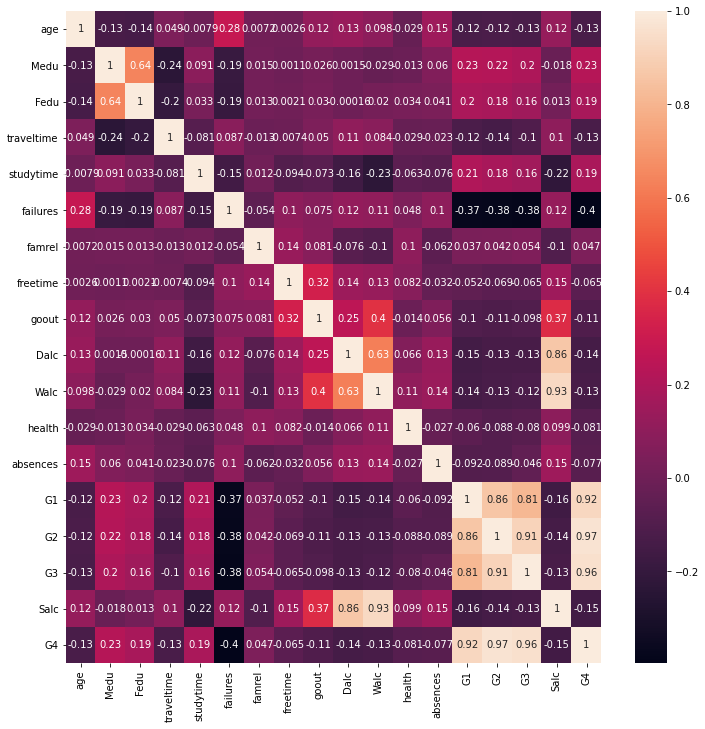

In [145]:
# Correlation Matrix

plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

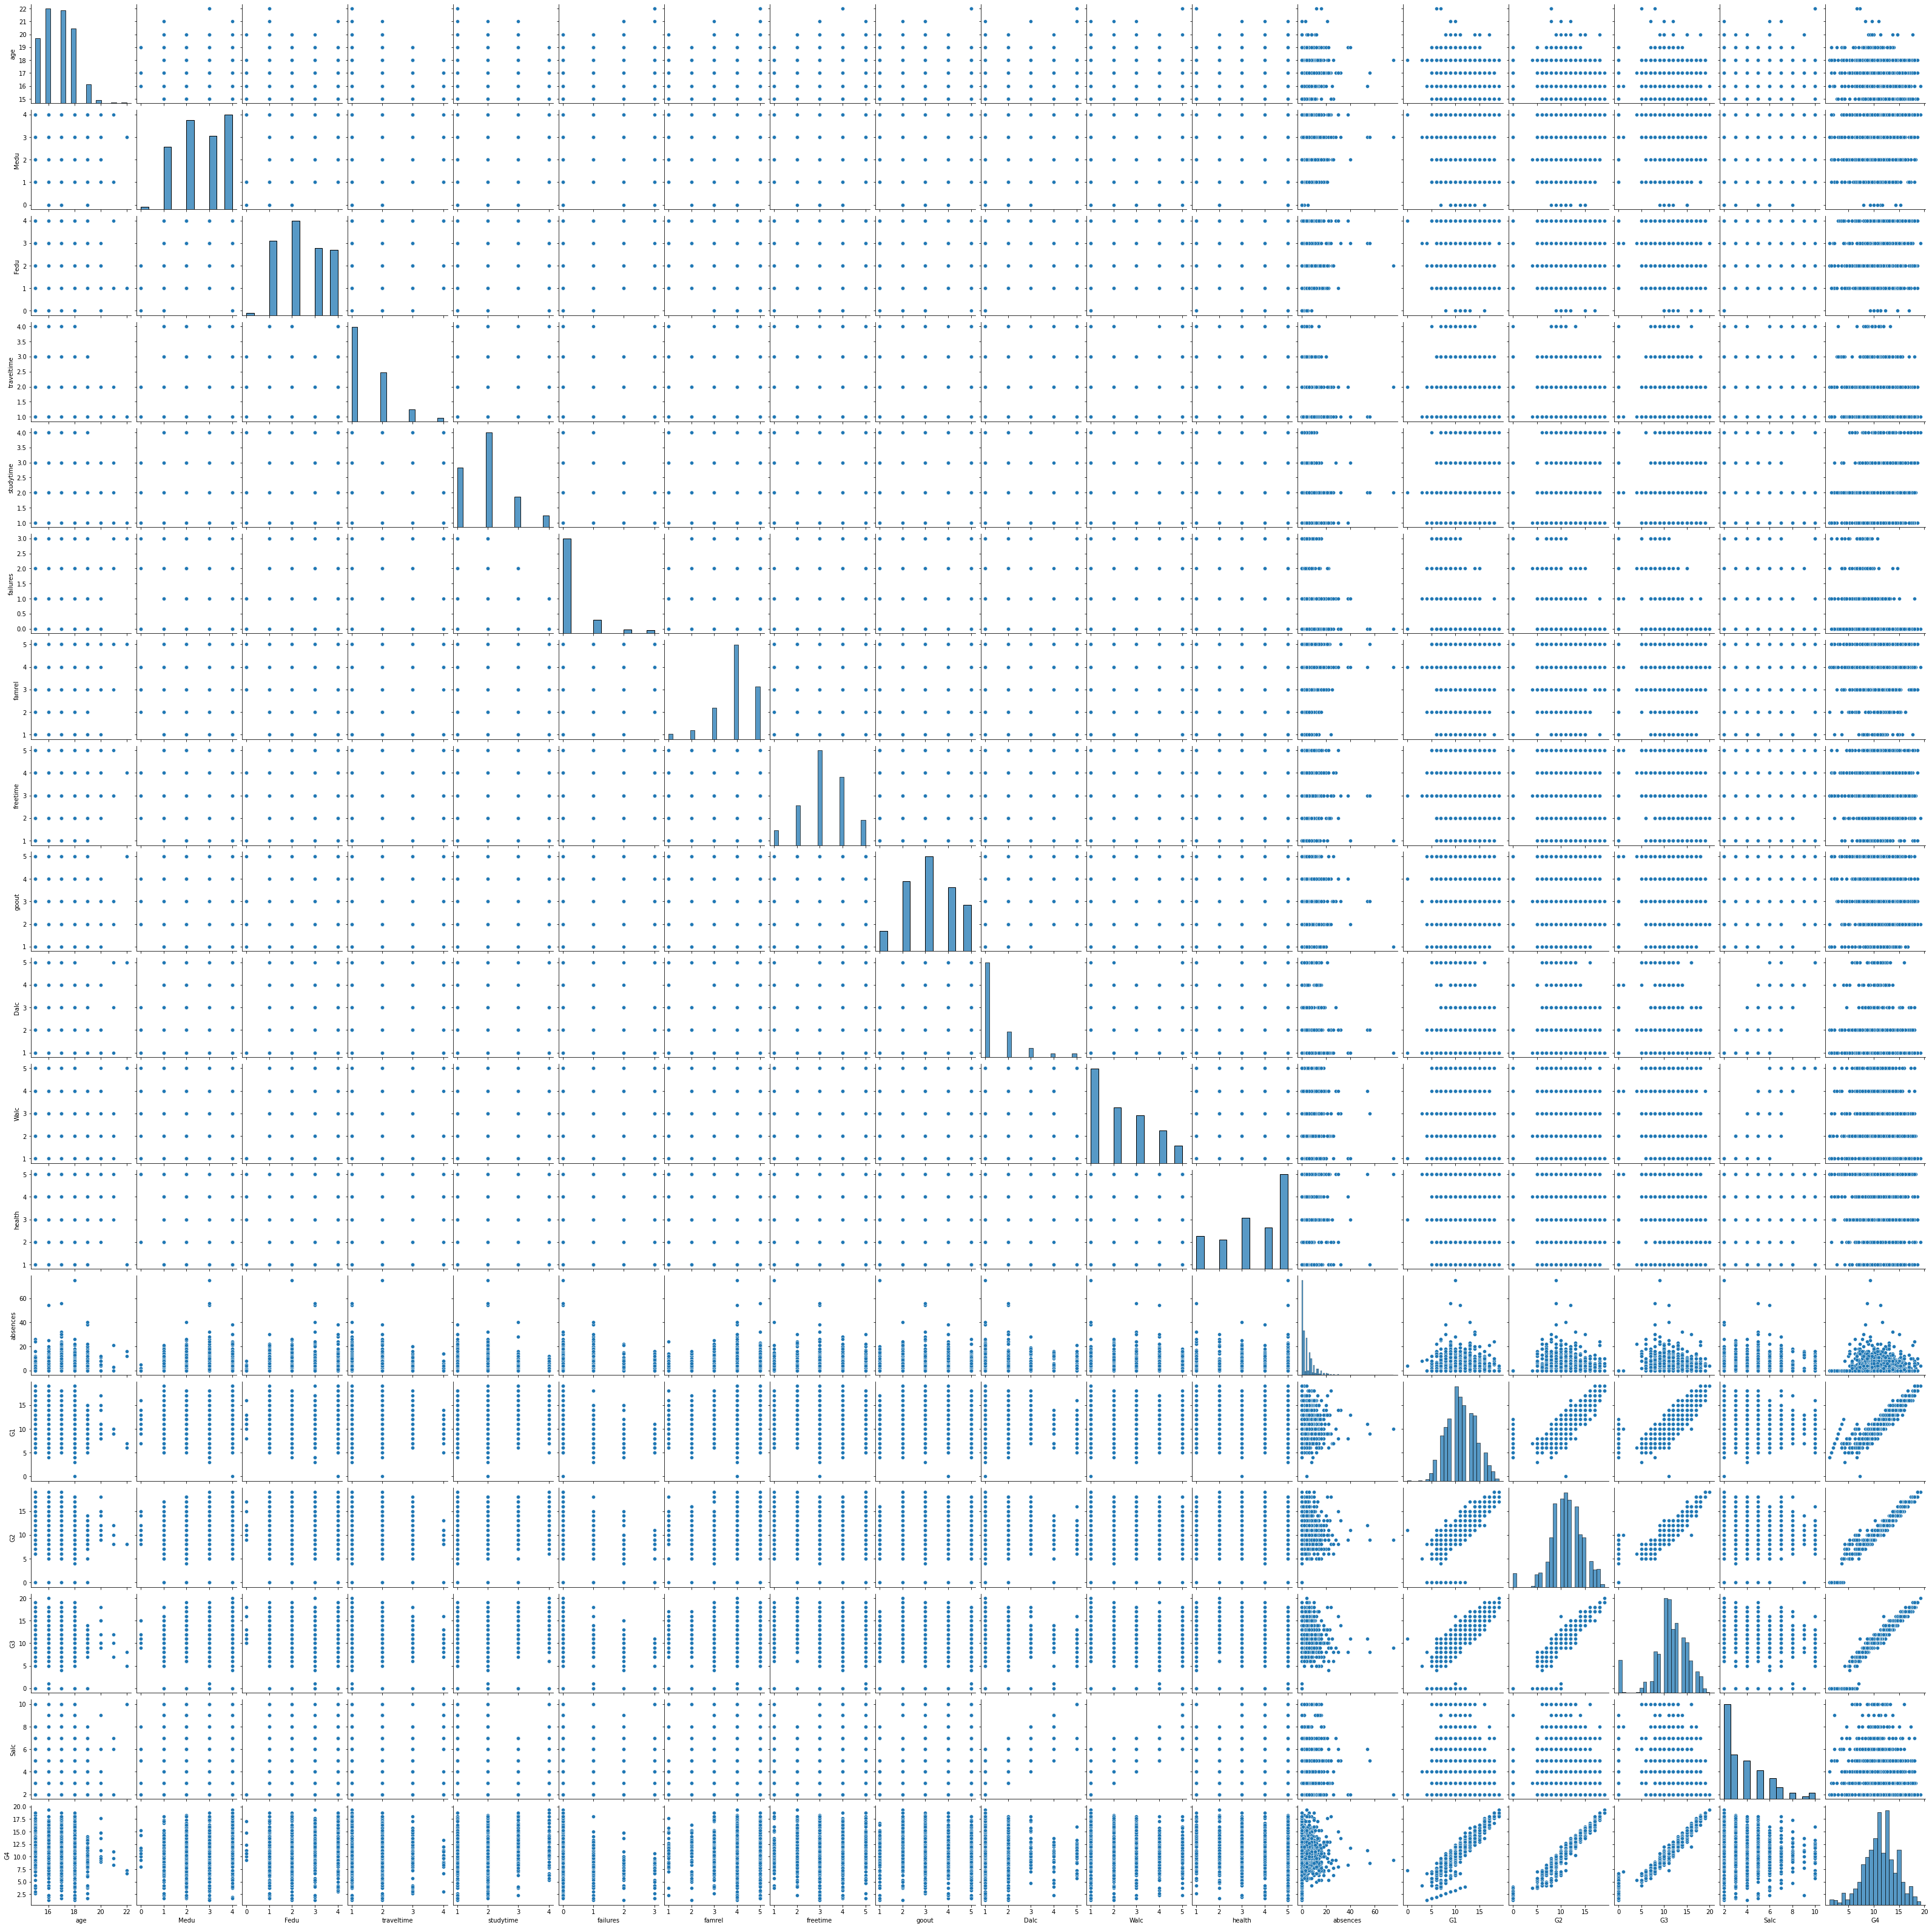

In [146]:
sns.pairplot(df)

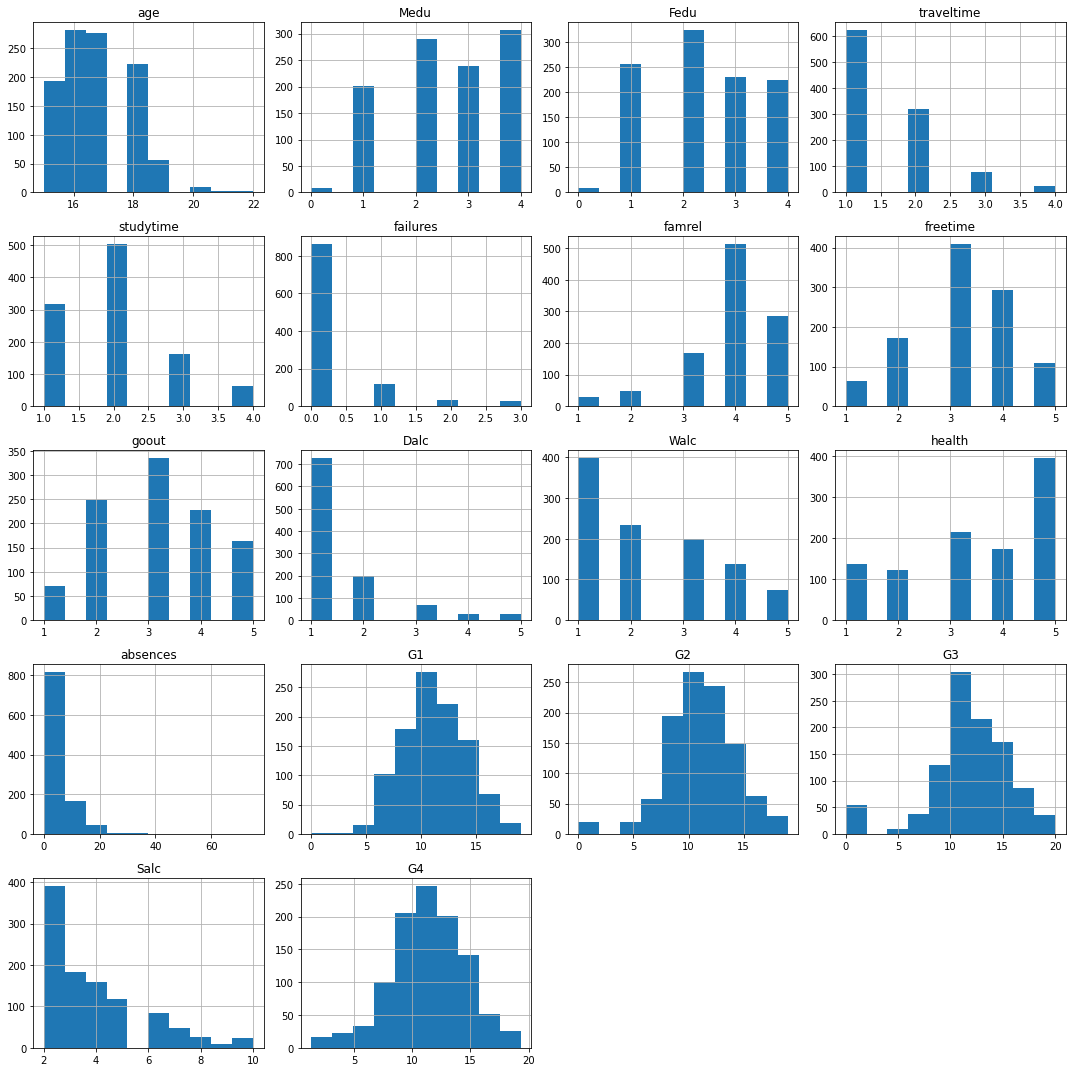

In [147]:
df.hist(figsize=(15,15)) 
#set a large figsize if you have > 9 variables
plt.tight_layout()
plt.show()

In [148]:
df.duplicated().sum()

0

In [149]:
continuous_labels = list(continuous.columns)
i = i for var in continuous_labels: #plotting boxplot for each variable
   plt.subplot(round(len(continuous_labels),0)/3+3,4,i)
   plt.boxplot(continuous[var],whis=5)
   plt.title(var)
   i+=1plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (<ipython-input-149-aca9363b6a2f>, line 2)

# Axe n°1 - Consommation alcool et résultats scolaires

- Comparatif Dalc et Walc sur les résultats scolaires

In [ ]:
plt.figure(figsize=(16,9))

ax = sns.lineplot(data=df, y="G4", x="Dalc")
ax = sns.lineplot(data=df, y="G4", x="Walc")
ax.legend(('5j / semaine', 'Weekend'), prop={"size":13})
plt.xlabel("Consommation d\'alcool de 1 à 5")
plt.ylabel('Moyenne des résultats scolaires')

plt.title('Comparatif consommation sur les résultats scolaires 5j et 2j, green : Walc, Blue : Dalc')

Il y a plus de jeunnes qui consomment le weekend que la semaine 

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(121)

df.G4.groupby(df.Walc).sum().plot(kind='pie', labels=['Pas trop', 'Un peu', 'Moyen', 'Moyen plus', 'Beaucoup'], autopct='%.f')
plt.axis('equal')
plt.title("Consommation le weekend")
plt.ylabel('Moyenne des résultats scolaires')

plt.subplot(122)

df.G4.groupby(df.Dalc).sum().plot(kind='pie', labels=['Pas trop', 'Un peu', 'Moyen', 'Moyen plus', 'Beaucoup'], autopct='%.f')
plt.axis('equal')
plt.title("Consommation du lundi au vendredi")
plt.ylabel('Moyenne des résultats scolaires')
plt.show()

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(121)

ax = sns.boxplot(x="Dalc", y="G4", data=df)
plt.xlabel('Consommation du lundi au vendredi')
plt.ylabel('Moyenne des résultats scolaires')

plt.subplot(122)

ax = sns.boxplot(x="Walc", y="G4", data=df)
plt.xlabel('Consommation du weekend')
plt.ylabel('Moyenne des résultats scolaires')


display(df[["G4"]].groupby(df["Dalc"]).agg(["max",'median',"min"]))
display(df[["G4"]].groupby(df["Walc"]).agg(["max",'median',"min"]))

- Il n'y a pas de grande différence sur les résultats scolaires entre la consommation du weekend et la semaine
- Fusion des deux courbes 

In [ ]:
plt.figure(figsize=(16,9))

sns.lineplot(data=df, x="Salc", y="G4")

plt.xlabel('Consommation du lundi au dimanche')
plt.ylabel('Moyenne des résultats scolaires')
plt.title('Comparatif consommation sur les résultats scolaires 7j')


In [ ]:
plt.figure(figsize=(32,12))

plt.subplot(121)
ax = sns.boxplot(x="Salc", y="G4", data=df)
ax.set(xlabel="Consomation du lundi au dimanche")
ax.set(ylabel="Moyenne des notes")


plt.subplot(122)
ax = df.G4.groupby(df.Salc).sum().plot(kind='pie', labels=['1 - Vraiment pas beaucoup', '2 - Pas beaucoup', '3 - Un petit peu', '4 - peu', '5 - moyen', '6 - pas mal', '7 - beaucoup', '8 - Vraiment beaucoup', '9 -Trop', '10 - Beaucoup trop'], autopct='%.f')
ax = plt.axis('equal')
ax = plt.title("Consommation du lundi au dimanche")

In [ ]:
display(df[["G4"]].groupby(df["Salc"]).agg(["max","mean","std",'median',"min"]))

- ### Conclusion : L'alcool affecte le résultat médian des élèves de 2 points
- ### Conclusion : L'écart de note diminue avec la consommation d'alcool

# Axe n°2 - Consommation d’alcool chez les jeunes

- ### AGE

In [ ]:
# KDE Distribution
plt.figure(figsize=(16,6))

df['age_p'] = (df['age']*100)/22
df['Salc_p'] = (df['Salc']*100)/10


plt.subplot(121)
ax = sns.lineplot(data=df, x="age", y="Salc_p")
ax.set(xlabel="Age")
ax.set(ylabel="Densité de population qui consomme de l'alcool 7j/s")

plt.subplot(122)
ax = df['age'].value_counts().plot(kind='bar', figsize=(14,8))
    
ax.set(xlabel="Age")
ax.set(ylabel="Count")

- ### premier pic de consommation à 17 ans pour les personnes de moins de 20ans et augmentation de la consommation après 20 ans 
- ### Second pique de consomation à 22 ans peu etre expliquer par le manque de représentation de cette tranche d'age.

- ### SEX

In [ ]:
plt.figure(figsize=(32,8))

plt.subplot(131)
ax = sns.barplot(x="sex", y="Dalc", hue="age", ci="sd", data=df)
ax.set(xlabel="sex")
ax.set(ylabel="Consomation du lundi au vendredi")

plt.subplot(132)
ax = sns.barplot(x="sex", y="Walc", hue="age", ci="sd", data=df)
ax.set(xlabel="sex")
ax.set(ylabel="Consomation le weekend")

plt.subplot(133)
ax = sns.barplot(x="sex", y="Salc", hue="age", ci="sd", data=df)

ax.set(xlabel="sex")
ax.set(ylabel="Consomation du lundi au dimanche")

Les garçons consomment plus que les filles 

- ### La sphère familiale

- - Parents Job

In [ ]:
plt.figure(figsize=(32, 12))

lables =['1', '2', '3', '4']

plt.subplot(121)
ax = sns.barplot(data = df, x="Pstatus", y="Salc", hue="Mjob")
ax.set(xlabel="Le statut des parents")
ax.set(ylabel="Consomation du lundi au dimanche")
ax.set_xticklabels(labels)
ax = plt.title("Travail de la mère")
plt.subplot(122)
ax = sns.barplot(data = df, x="Pstatus", y="Salc", hue="Fjob")
ax.set(xlabel="Le statut des parents")
ax.set(ylabel="Consomation du lundi au dimanche")
ax = plt.title("Travail de la père")

In [ ]:
plt.figure(figsize=(24,9))
plt.subplot(121)
sns.swarmplot(x="Mjob",y="Salc",hue="Pstatus",size=2, data=df, dodge = False)

plt.subplot(122)
sns.swarmplot(x="Fjob",y="Salc",hue="Pstatus",size=2, data=df, dodge = False)

- - ### Parents Edu

In [ ]:
plt.figure(figsize=(32, 10))

plt.subplot(121)

ax = sns.boxplot(x="Medu",y="Salc",data=df)
ax.set(xlabel="Niveau étude de la mére")
ax.set(ylabel="Consomation du lundi au dimanche")


plt.subplot(122)
ax = sns.boxplot(x="Fedu",y="Salc",data=df)
ax.set(xlabel="Niveau étude de la pére")
ax.set(ylabel="Consomation du lundi au dimanche")


In [ ]:
'''
print("\n")
print(f"Médiane :{df.Medu.groupby(df['Salc']).median()}")
print("\n")
print(f"Médiane max : {df.Medu.groupby(df['Salc']).median().max()}")
print(f"Médiane min : {df.Medu.groupby(df['Salc']).median().min()}")

print("\n")
print(f"Max :{df.Salc.groupby(df['Medu']).max()}")

print("\n")
print(f"Min :{df.Salc.groupby(df['Medu']).min()}")
'''

display(df[["Salc"]].groupby(df["Medu"]).agg(["max",'median',"min"]))
display(df[["Salc"]].groupby(df["Fedu"]).agg(["max",'median',"min"]))
display(df[["Salc"]].groupby(df["Pstatus"]).agg(["max",'median',"min"]))


- - Family size

In [ ]:
df.loc[df['famsize'] == 'GT3', 'fs'] = '0'
df.loc[df['famsize'] == 'LE3', 'fs'] = '1'

ax = plt.figure(figsize=(16, 9))
plt.subplot(121)
ax = sns.barplot(x="famsize", y="Salc", data=df)
ax.set_xticklabels(["Plus de 3","Moins de 3"])
ax.set(xlabel="Taille de la famille")
ax.set(ylabel="Consomation du lundi au dimanche")

plt.subplot(122)
ax = sns.boxplot(x="famsize", y="Salc", data=df)
ax.set_xticklabels(["Plus de 3","Moins de 3"])
ax.set(xlabel="Taille de la famille")
ax.set(ylabel="Consomation du lundi au dimanche")

- ### Free Time

In [ ]:
plt.figure(figsize=(16,9))
plt.subplot(121)
ax = sns.barplot(x="freetime", y="Salc", data=df)
ax.set(xlabel="Temps libre")
ax.set(ylabel="Consomation du lundi au dimanche")

plt.subplot(122)
ax =sns.boxplot(x="freetime", y="Salc", data=df)
ax.set(xlabel="Temps libre")
ax.set(ylabel="Consomation du lundi au dimanche")

- ### Sorties

In [ ]:
plt.figure(figsize=(16, 9))
ax = sns.barplot(x="goout", y="Salc", hue='sex',data=df)
ax.set(xlabel="Sortie")
ax.set(ylabel="Consomation du lundi au dimanche")

- ### Ville / Campagne

In [ ]:
g = sns.FacetGrid(df, col="address", height=10)
g.map(sns.histplot, "Salc")
g.set(xlabel="Consomation du lundi au dimanche")
g.set(ylabel="Densité")

- ### Math et Portugais

In [ ]:
'''g = sns.FacetGrid(df, col="label")
g.map(sns.histplot, "Salc")'''


plt.subplot(121)
ax = df['label'].value_counts().plot(kind='bar', figsize=(14,8))
ax.set(xlabel="Cour de math et portugais")
ax.set(ylabel="Compte")


plt.subplot(122)
ax = sns.boxplot(x=df["label"], y=df["Salc"])
ax.set(xlabel="Consommation du luni au dimanche")
ax.set(ylabel="Compte")

- ### School type

In [ ]:
ax = plt.figure(figsize=(16,9))

plt.subplot(121)
ax = sns.barplot(x="school", y="Salc", data=df)
ax.set(xlabel="Cour de math et portugais")
ax.set(ylabel="Consommation du lundi au vendredi")

plt.subplot(122)
ax = sns.boxplot(x="school", y="Salc", data=df)
ax.set(xlabel="Cour de math et portugais")
ax.set(ylabel="Consommation du lundi au vendredi")

- - Santé

In [ ]:
df['health_p'] = (df['health']*100)/5
df['Salc_p'] = (df['Salc']*100)/10

plt.figure(figsize=(16,9))

sns.lineplot(data=df, y="Salc_p", x="age")
sns.lineplot(data=df, y="health_p", x="age")
plt.ylabel('pourcent')

La consommation n'a pas d'impacte à court terme sur la santé

# Axe n°3 - L'influence sur les résultat scolaire

- ### Moyenne des notes / ville - campagne 

In [ ]:

sns.catplot(x="address", y="G4",data=df)

- ### Moyenne des notes / Internet / ville - campagne 

In [ ]:
plt.figure(figsize=(16, 9))
ax = sns.catplot(x="internet", y="G4", hue="address", label=["oui", "non"], data=df, height=7)
ax.set_xticklabels(["Non","Oui"])
ax.set(xlabel="Internet")
ax.set(ylabel="Moyenne des notes")

les élèves ayant internet on de meilleurs résultats scolaire

- ### Moyenne des notes / H-F

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(x="sex", y="G4",data=df)
ax.set(xlabel="Sexe")
ax.set(ylabel="Moyenne des notes")

Pas de différences notable

- ### Moyenne des notes / soutien scolaire

In [ ]:
plt.figure(figsize=(16,9))

plt.subplot(131)
ax = sns.boxplot(x="schoolsup", y="G4", data=df)
ax.set_xticklabels(["Oui","Non"])
ax.set(xlabel="Soutien scolaire de l'école")
ax.set(ylabel="Moyenne des notes")

plt.subplot(132)
ax = sns.boxplot(x="famsup", y="G4", data=df)
ax.set_xticklabels(["Non","Oui"])
ax.set(xlabel="Soutien scolaire de la famille")
ax.set(ylabel="Moyenne des notes")

plt.subplot(133)
ax = sns.boxplot(x="paid", y="G4", data=df)
ax.set_xticklabels(["Non","Oui"])
ax.set(xlabel="Soutien scolaire payé")
ax.set(ylabel="Moyenne des notes")

display(df[["G4"]].groupby(df["schoolsup"]).agg(["max",'median',"min"]))
display(df[["G4"]].groupby(df["famsup"]).agg(["max",'median',"min"]))
display(df[["G4"]].groupby(df["paid"]).agg(["max",'median',"min"]))

Le soutien réduit les inégalités

- ### Situation familliale sur les résultats scolaires 

In [ ]:
g = sns.FacetGrid(df, col="Mjob")
g.map(sns.histplot, "G4")

g = sns.FacetGrid(df, col="Fjob")
g.map(sns.histplot, "G4")

g = sns.FacetGrid(df, col="Pstatus")
g.map(sns.histplot, "G4")



In [ ]:
plt.figure(figsize=(24,9))
plt.subplot(121)
ax = sns.swarmplot(x="Mjob",y="G4",hue="Pstatus",data=df, dodge = False)
ax.set(xlabel="Type de travail de la mère")
ax.set(ylabel="Moyenne des notes")

plt.subplot(122)
ax = sns.swarmplot(x="Fjob",y="G4",hue="Pstatus",data=df, dodge = False)

ax.set(xlabel="Type de travail du père")
ax.set(ylabel="Moyenne des notes")

In [ ]:
plt.figure(figsize=(24,9))
plt.subplot(121)
ax = sns.swarmplot(x="Medu",y="G4",hue="Pstatus",data=df, dodge = False)
ax.set(xlabel="Etues de la mère")
ax.set(ylabel="Moyenne des notes")

plt.subplot(122)
ax = sns.swarmplot(x="Fedu",y="G4",hue="Pstatus",data=df, dodge = False)
ax.set(xlabel="Etudes du père")
ax.set(ylabel="Moyenne des notes")

- ### Absences

In [ ]:
plt.figure(figsize=(24,9))

plt.subplot(221)
ax1 = sns.stripplot(x="absences",y="G4",hue="Pstatus", dodge=True, data=df)
ax1.set(xlabel="absences")
ax1.set(ylabel="Moyenne des notes")
        
plt.subplot(222)
ax2 = sns.stripplot(x="absences",y="Dalc", dodge=True, data=df)
ax2.set(xlabel="absences")
ax2.set(ylabel="Consommation du lundi au vendredi")
        
plt.subplot(223)
ax2 = sns.stripplot(x="absences",y="Walc", dodge=True, data=df)
ax2.set(xlabel="absences")
ax2.set(ylabel="Consommation du weekend")        
        
plt.subplot(224)
ax2 = sns.stripplot(x="absences",y="Salc", dodge=True, data=df)
ax2.set(xlabel="absences")
ax2.set(ylabel="Consommation du lundi au dimanche") 

- ### study time

In [ ]:
plt.figure(figsize=(16,9))

plt.subplot(121)
ax = sns.boxplot(x="studytime",y="G4",data=df)
ax.set(xlabel="Temps de travail personnel")
ax.set(ylabel="Moyenne des notes")    

plt.subplot(122)
ax = sns.boxplot(x="studytime",y="Salc",data=df)
ax.set(xlabel="Temps de travail personnel")
ax.set(ylabel="Consommation 7j")    


In [ ]:
ax = sns.catplot(x="Salc",y="G4", col="sex", hue="studytime", dodge=True, data=df, height=5, aspect=16/9)
ax.set(xlabel="Consommation 7j")
ax.set(ylabel="Moyenne des notes")   


3 - R&D ML

In [154]:
Data= df_m.append([df_m,df_p])

In [155]:
Data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,label
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,mat
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,mat
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,mat
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,mat
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,mat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,por
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,por
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,por
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,por


In [157]:
##Convert string to numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df

In [159]:
Data = FunLabelEncoder(Data)
print(Data)

     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0         0    0   18        1        0        0     4     4     0     4  ...   
1         0    0   17        1        0        1     1     1     0     2  ...   
2         0    0   15        1        1        1     1     1     0     2  ...   
3         0    0   15        1        0        1     4     2     1     3  ...   
4         0    0   16        1        0        1     3     3     2     2  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
644       1    0   19        0        0        1     2     3     3     2  ...   
645       1    0   18        1        1        1     3     1     4     3  ...   
646       1    0   18        1        0        1     1     1     2     2  ...   
647       1    1   17        1        1        1     3     1     3     3  ...   
648       1    1   18        0        1        1     3     2     3     2  ...   

     freetime  goout  Dalc 

In [160]:
new_data = Data[['sex', 'age', 'address', 'Pstatus','Mjob', 'Fjob', 'reason', 'guardian','studytime','paid','internet','freetime', 'Dalc',
       'Walc', 'health', 'absences','G3']]
print(new_data)

     sex  age  address  Pstatus  Mjob  Fjob  reason  guardian  studytime  \
0      0   18        1        0     0     4       0         1          2   
1      0   17        1        1     0     2       0         0          2   
2      0   15        1        1     0     2       2         1          2   
3      0   15        1        1     1     3       1         1          3   
4      0   16        1        1     2     2       1         0          2   
..   ...  ...      ...      ...   ...   ...     ...       ...        ...   
644    0   19        0        1     3     2       0         1          3   
645    0   18        1        1     4     3       0         1          2   
646    0   18        1        1     2     2       0         1          2   
647    1   17        1        1     3     3       0         1          1   
648    1   18        0        1     3     2       0         1          1   

     paid  internet  freetime  Dalc  Walc  health  absences  G3  
0       0         0  

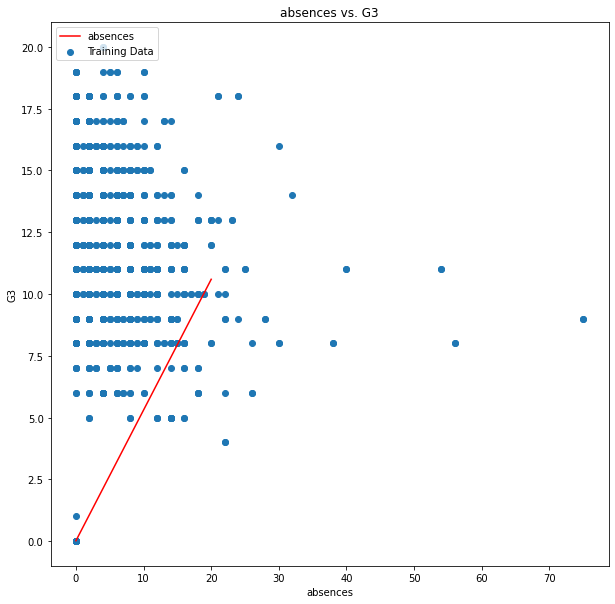

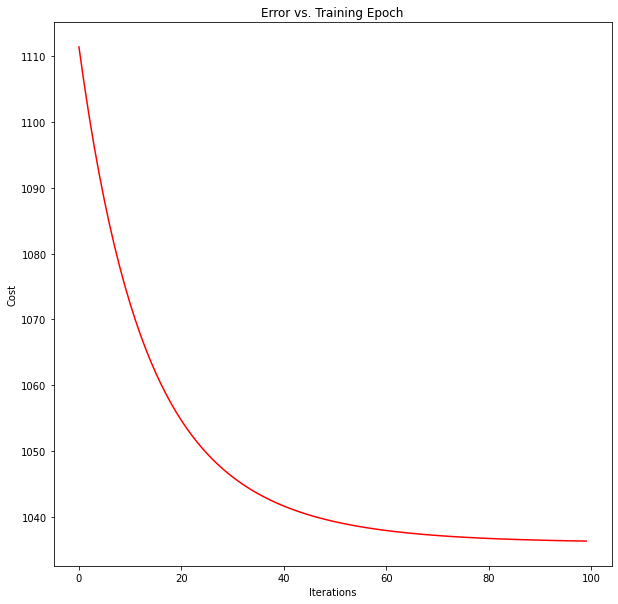

Duration running: 0:00:20.290582 second


In [166]:
from datetime import datetime

start_time = datetime.now()

# separate  (training data) from y (target variable)
cols = new_data.shape[1]
x = new_data.iloc[:, 0:cols-1]

y = new_data.iloc[:, cols-1:cols]

# convert to matrices and initialize theta
x = x.values
y = y.values


# theta = np.array(np.array([0,0,0]))
theta = np.zeros(len(new_data.columns) - 1, dtype=float)

# print('shape of x: ', x.shape)
# print('shape of y: ', y.shape)
# print('shape of theta: ', theta.shape)

# initialize variables for learning rate and iterations
alpha = 0.0000001
iters = 100


# cost function
def computeCost(x, y, theta):
    z = (x * np.transpose(theta) - y) ** 2
    return np.sum(z) / (2 * len(x))


temp = np.zeros(theta.shape[0])
cost = np.zeros(iters)


# term1 = []
# for i in range(iters):
#     for j in range(theta.shape[0]):
#         term = (alpha / len(x)) * np.sum(x[:, j].dot((x.dot(theta.T) - y)))
#         term1.append(term)
# print(len(term1))


def gradientDescent(x, y, theta, alpha, iters):
    temp = np.zeros(theta.shape[0])
    cost = np.zeros(iters)
    for i in range(iters):
        for j in range(theta.shape[0]):
            term = (alpha / len(x)) * np.sum(x[:, j].dot((x.dot(theta.T) - y)))
#             print('term {}= {} '.format(j, term))
            temp[j] = theta[j] - term

        theta = temp
        cost[i] = computeCost(x, y, theta)

    return theta, cost


g2, cost2 = gradientDescent(x, y, theta, alpha, iters)
this_cost = computeCost(x, y, g2)

# get best fit line
x = np.linspace(new_data['G3'].min(), new_data['G3'].max(), 100)


f = g2[0] + (g2[1] * x)

# draw the line for Size vs. Price
fig, ax = plt.subplots(figsize=(10 ,10))
ax.plot(x, f, 'r', label='absences')
ax.scatter(new_data['absences'], new_data['G3'], label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('absences')
ax.set_ylabel('G3')
ax.set_title('absences vs. G3')

# draw error graph
fig2, ax = plt.subplots(figsize=(10, 10))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

plt.show()


end_time = datetime.now()
print('Duration running: {} second'.format(end_time - start_time))